#**PORTOFOLIO INTRODUCTION**

Dewasa ini, Produksi Permintaan Asuransi memang telah meningkat. Namun, seiringnya waktu, masih ada saja "perilaku customers yang di luar prediksi industri Asuransi". Salah satu contohnya adalah "Perilaku customers yang tidak/belum membayarnya. Sehingga membuat kami tertarik untuk membahas dan memprediksi produk yang lebih besar kemungkinan yang akan dibayarkan sehingga dapat menguntungkan bagi Perusahaan tersebut.


Pada portofolio ini kami sajikan batasan cakupan data analysist kami berupa data curent year (2023) dalam bidang Credit Life.

# **About Dataset**


Data ini berisi tentang Produktivitas dari Credit Life selama 2023 yang berhasil kami kumpulkan. Adapun hal-hal yang bersifat **"confidential"** telah kami modifikasi kolom grup_client, customer_id, participant dengan sedikit penyamaran dan perubahan data yang tetap stabil dan sesuai dengan proporsi aslinya.

Adapun beberapa istilah yang kami dapat gunakan agar sebelumnya dapat dipahami, yaitu terkait group_client yang mencakup sebagai berikut:

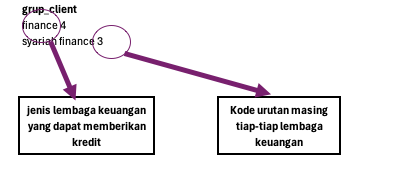

*   Finance = Perusahaan Finance Konvensional
*   Syariah Finance = Perusahaan Finance Syariah
*   Finance Traditional = Koperasi, KJK dll Konvensional
*   Syariah Finance Traditional = Koperasi, KJK dll Syariah
*   Bank = Bank Konvensional
*   Syariah Bank = Bank Syariah
*   Fintech = Fintech Konvensional
*   Syariah Fintech = Fintech Syariah


**Klasifikasi yang telah dirangkum dari data set ini adalah:**

* Klasifikasi Sum of Amount
1.   standard : s.d 1.000.000.000
2.   high     : 1.000.000.001 - 3.000.000.000
3.   higher   : 3.000.000.001 - 4.000.000.000
4.   highest  : 4.000.000.001 - 5.000.000.000

* Klasifikasi Masa Asuransi
1.   short	: di bawah 3 tahun
2.   medium : 4-10 tahun
3.   long   :11-20 tahun
4.   longest:21-30 tahun

* Klasifikasi Usia Masuk
1.   young      :  0-19 tahun
2.   productive : 20-50 tahun
3.   pra pension: 51-55 tahun
4.   pension	   : 56-80 tahun



# **DATA SOURCE :** https://docs.google.com/spreadsheets/d/1OGKRtROil3EJNC6qMWfXJlDbssB3nUrn/edit?usp=drive_link&ouid=117163702789484068947&rtpof=true&sd=true


```
Column Desciptions

```
*   **month**             : berisi tentang bulan produksi premium Credit Life
*   **year**              : berisi tentang tahun produksi premium Credit Life
*   **customer_id**       : berisi tentang no id dari partisipant (peserta)
*   **grup_client**       : berisi tentang jenis lembaga keuangan rekanan
*   **participant**       : berisi tentang nama partisipant (peserta)
*   **gender**            : berisi tentang jenis kelamin partisipant (peserta)
*   **dob**               : berisi tentang tanggal lahir participant (peserta)
*   **age**               : berisi tentang usia entry dari participant (peserta) akad asuransi
*   **tenure**            : berisi tentang masa berlaku polis dalam bulan
*   **polis_date_in**     : berisi tentang tanggal polis mulai
*   **polis_date_out**    : berisi tentang tanggal polis berakhir
*   **sum_of_amount**     : berisi tentang nilai uang asuransi yang akan dijadikan jaminan
*   **premium_production**: berisi tentang nilai premium awal yang dihitung
*   **total_fee**         : berisi tentang nilai seluruh total fee (komisi)
*   **premium_nett**      : berisi tentang nilai premium yang setelah dikurangi fee
*   **premium_paid**      : berisi tentang nilai premium yang telah terbayarkan
*   **procuct_credit**    : berisi tentang jenis Credit Life


# **Business Issues**

Project ini dirancang untuk mengetahui Perilaku Participant terhadap Kewajiban Pembayaran Asuransinya beserta Penyebaran Distribusi Produksi Credit Life **'*Credit Insurance*'** dengan Issues Hightlight sebagai berikut:

1. Apakah setiap perticipant yang melakukan penutupan Asuransi selalu membayar premiumnya?  
2. Relasi antara Age dalam premium paid of Credit Life  
3. Relasi antara Product Credit dalam premium paid of Credit Life  
4. Relasi antara Gender dalam premium paid of Credit Life  
5. Segmentation Product dan Clustering  
6. Bandingkan Clustering tersebut dengan Klasifikasi yang telah dibuat dari Penyebaran Variabel sum of amount, tenure, dan age
7. Evaluation dan Business Recomendation

# **Importing Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Loading**

In [ ]:
# Dataset loading menggunakan pandas excel
credit_life = pd.read_excel('/content/drive/MyDrive/credit_life_dataset_2023.xlsx')
# Menampilkan header teratas pada dataset
credit_life.head()

no  month  year           customer_id        grup_client  \
0   1     12  2023  17376347260000042506  syariah finance 1   
1   2     12  2023  17376347260000042508  syariah finance 1   
2   3     12  2023  17376347260000042510  syariah finance 1   
3   4     12  2023  17376347260000042512  syariah finance 1   
4   5     12  2023  17376347260000042514  syariah finance 1   

            participant  gender        dob  age  tenure_(month)  ...  \
0        achmad zaelani    male 1997-11-02   26              24  ...   
1   asep misbahul anwar    male 1989-07-05   34              18  ...   
2      intan nurhalizah  female 1993-12-03   30              36  ...   
3       eneu gusmayanti  female 1989-04-24   35              36  ...   
4  budiman rojali s hum    male 1979-08-16   44              36  ...   

  polis_date_out sum_of_amount  premium_production  total_fee  premium_nett  \
0     2025-11-08   260000000.0            260000.0   806.0000     161.20000   
1     2025-12-07    13420000.0             13420.0    37.5760       7.51520   
2     2026-11-07   286400000.0            286400.0  1460.6400     292.12800   
3     2026-11-07    43524000.0             43524.0   274.2012      54.84024   
4     2026-11-06    66870000.0             66870.0   875.9970     175.19940   

   premium_paid  procuct_credit        c1     c2          c3  
0     644.80000         806.000  standard  short  productive  
1      30.06080          37.576  standard  short  productive  
2    1168.51200        1460.640  standard  short  productive  
3     219.36096         274.201  standard  short  productive  
4     700.79760         875.997  standard  short  productive  

[5 rows x 21 columns]

# **Data Cleansing dan Processing**

In [ ]:
# Pengecekan jumlah baris dan kolom pada dataset
credit_life.shape

(62481, 21)

In [ ]:
# Pengecekan informasi dasar kolom dan type data di dataset kita
credit_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62481 entries, 0 to 62480
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   no                  62481 non-null  int64         
 1   month               62481 non-null  int64         
 2   year                62481 non-null  int64         
 3   customer_id         62481 non-null  object        
 4   grup_client         62481 non-null  object        
 5   participant         62481 non-null  object        
 6   gender              62481 non-null  object        
 7   dob                 62481 non-null  datetime64[ns]
 8   age                 62481 non-null  int64         
 9   tenure_(month)      62481 non-null  int64         
 10  polis_date_in       62481 non-null  datetime64[ns]
 11  polis_date_out      62481 non-null  datetime64[ns]
 12  sum_of_amount       62481 non-null  float64       
 13  premium_production  62481 non-null  float64   

In [ ]:
# Pengecekan Numerical Value pada dataset
credit_life.describe()

no         month          year           age  tenure_(month)  \
count  62481.000000  62481.000000  62481.000000  62481.000000    62481.000000   
mean   31241.000000     11.500600   2022.999984     41.312543       68.301244   
std    18036.855422      0.525445      0.004001     10.934226       58.623191   
min        1.000000      1.000000   2022.000000      4.000000        0.000000   
25%    15621.000000     11.000000   2023.000000     33.000000       24.000000   
50%    31241.000000     12.000000   2023.000000     41.000000       48.000000   
75%    46861.000000     12.000000   2023.000000     49.000000      108.000000   
max    62481.000000     12.000000   2023.000000     79.000000      360.000000   

       sum_of_amount  premium_production      total_fee  premium_nett  \
count   6.248100e+04        6.248100e+04   62481.000000  62481.000000   
mean    1.238352e+08        1.238352e+05    3429.483997    327.591294   
std     1.920320e+08        1.920320e+05    7689.907801    802.883170   
min     3.000000e+04        3.000000e+01       0.000000      0.000000   
25%     1.580000e+07        1.580000e+04     102.000000      5.330813   
50%     5.000000e+07        5.000000e+04     566.100000     46.000000   
75%     1.500000e+08        1.500000e+05    2804.690000    271.215000   
max     4.000000e+09        4.000000e+06  230211.600000  46042.320000   

        premium_paid  procuct_credit  
count   62481.000000    62481.000000  
mean     3101.892703     2804.892191  
std      7077.204637     7090.761266  
min        -3.100000        0.000000  
25%        90.450000        4.250000  
50%       504.900000      248.100000  
75%      2484.496800     1848.000000  
max    184169.280000   230211.600000

In [ ]:
# Melakukan pengecekan 'Null' Values pada dataset
credit_life.isnull().sum().sort_values(ascending=False)/credit_life.shape[0]*100

In [ ]:
# Melakukan pengecekan 'Filna' Values pada dataset
credit_life['premium_paid'].fillna(credit_life['premium_paid'].mean(), inplace=True)

In [ ]:
# Melakukan pengecekan Value Counts terhadap semua columns didalam dataset
for i in credit_life.columns:
    print(i)
    print("    ")
    print(credit_life[i].value_counts())
    print("    ")

no
    
1        1
41646    1
41648    1
41649    1
41650    1
        ..
20832    1
20833    1
20834    1
20835    1
62481    1
Name: no, Length: 62481, dtype: int64
    
month
    
12    31741
11    30370
10      347
9         8
1         5
8         3
4         2
6         2
7         2
2         1
Name: month, dtype: int64
    
year
    
2023    62480
2022        1
Name: year, dtype: int64
    
customer_id
    
17376347260000042506    1
23317625280001175204    1
23317625280001175212    1
23317625280001175214    1
23317625280001175219    1
                       ..
22528610030094224216    1
22528610030094224217    1
22528610030094224218    1
22528610030094224219    1
23454523310065070003    1
Name: customer_id, Length: 62481, dtype: int64
    
grup_client
    
syariah bank 1            19741
syariah bank 2             6909
syariah bank 3             4437
bank 4                     3611
syariah bank 4             2014
                          ...  
finance traditional 15        1
fi

In [ ]:
# Melakukan pengecekan terhadap data duplikat
credit_life.drop_duplicates(inplace=True)
print(credit_life.drop_duplicates(inplace=True))

None


In [ ]:
# Melakukan pengecekan terhadap outliers
z_scores = stats.zscore(credit_life['premium_paid'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
credit_life = credit_life[filtered_entries]

print(credit_life)

          no  month  year           customer_id          grup_client  \
0          1     12  2023  17376347260000042506    syariah finance 1   
1          2     12  2023  17376347260000042508    syariah finance 1   
2          3     12  2023  17376347260000042510    syariah finance 1   
3          4     12  2023  17376347260000042512    syariah finance 1   
4          5     12  2023  17376347260000042514    syariah finance 1   
...      ...    ...   ...                   ...                  ...   
62476  62477     10  2023  23481352650029490156          finance 134   
62477  62478      9  2023  23259345830043399334          finance 108   
62478  62479      9  2023  23259345830043399339          finance 108   
62479  62480     10  2023  23454523310065079826  syariah finance 111   
62480  62481     10  2023  23454523310065070003  syariah finance 119   

                     participant  gender        dob  age  tenure_(month)  ...  \
0                 achmad zaelani    male 1997-11-02   

# **Exploratory Data Analysis (EDA)**

#**Klasifikasi data telah dilakukan yaitu Level Sum of Amount didefinisikan "c1", Level Tenure didefinisikan "c2", dan Level Age didefinisikan "c3"**

#Scatter Plot

1. Klasifikasi berdasarkan Sum of Amount (Uang Asuransi)

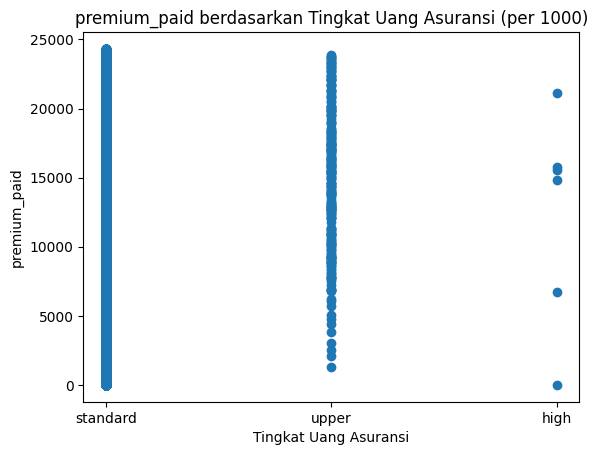

In [ ]:
# Mengambil kolom c1 (level Uang Asuransi) dan premium_paid
x = credit_life['c1']
y = credit_life['premium_paid']
plt.scatter(x, y)
plt.xlabel('Tingkat Uang Asuransi')
plt.ylabel('premium_paid')
plt.title('premium_paid berdasarkan Tingkat Uang Asuransi (per 1000)')

# Menampilkan plot
plt.show()

Klasifikasi berdasarkan Uang Asuransi terbanyak adalah "Standard"

2. Klasifikasi berdasarkan Tenure (Masa Asuransi)

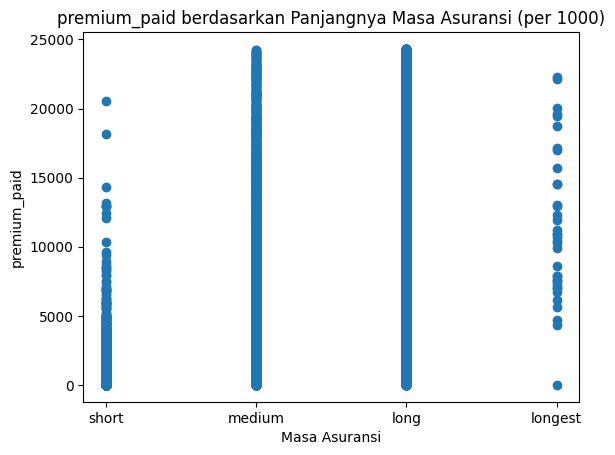

In [ ]:
# Mengambil kolom c2 (level Uang Asuransi) dan premium_paid
x = credit_life['c2']
y = credit_life['premium_paid']
plt.scatter(x, y)
plt.xlabel('Masa Asuransi')
plt.ylabel('premium_paid')
plt.title('premium_paid berdasarkan Panjangnya Masa Asuransi (per 1000)')

# Menampilkan plot
plt.show()

Klasifikasi berdasarkan Masa Asuransi yang terbanyak adalah "Medium dan Long"

3. Klasifikasi berdasarkan Age (Usia Masuk)

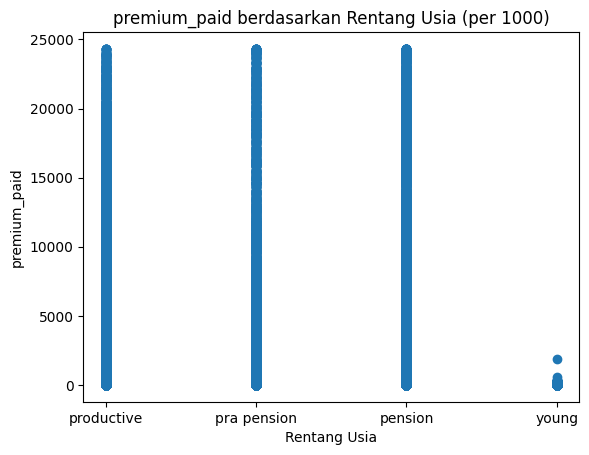

In [ ]:
# Mengambil kolom c3 (Usia) dan premium_paid
x = credit_life['c3']
y = credit_life['premium_paid']
plt.scatter(x, y)
plt.xlabel('Rentang Usia')
plt.ylabel('premium_paid')
plt.title('premium_paid berdasarkan Rentang Usia (per 1000)')

# Menampilkan plot
plt.show()

Klasifikasi berdasarkan Usia Masuk Asuransi adalah "Productive, Pra Pension, dan Pension"

## **Relationship of gender with premium_paid**

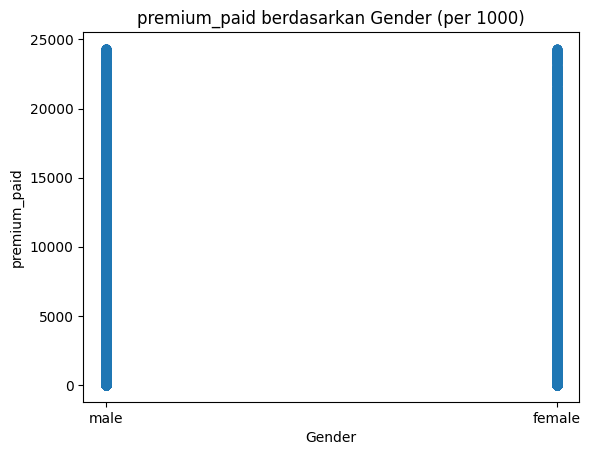

In [ ]:
# Mengambil kolom gender dan premium_paid
x = credit_life['gender']
y = credit_life['premium_paid']
plt.scatter(x, y)
plt.xlabel('Gender')
plt.ylabel('premium_paid')
plt.title('premium_paid berdasarkan Gender (per 1000)')

# Menampilkan plot
plt.show()

laki-laki dan perempuan sama-sama memiliki porsi yang seimbang terkait dengan premium yang telah dibayarkan (premium_pad), sehingga bahwa hubungan antara gender dengan perilaku participant asuransi yang telah membayar preminnya tidak saling berhubungan secara signifikan.

## **Relationship of product_credit with premium_paid**

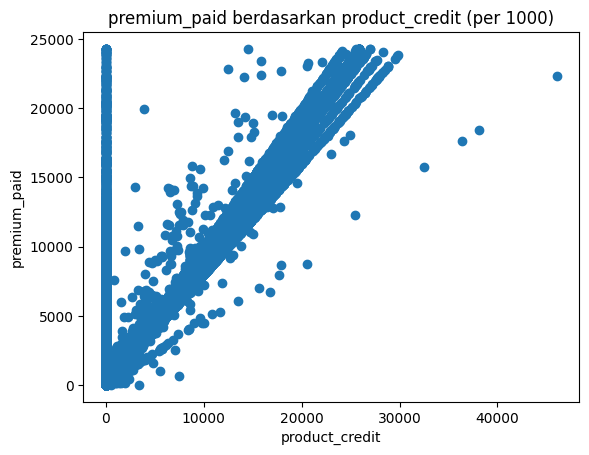

In [ ]:
# Mengambil kolom product_credit dan premium_paid
x = credit_life['procuct_credit']
y = credit_life['premium_paid']
plt.scatter(x, y)
plt.xlabel('product_credit')
plt.ylabel('premium_paid')
plt.title('premium_paid berdasarkan product_credit (per 1000)')

# Menampilkan plot
plt.show()

tren hubungan dari scatter plot di atas cukup signifikan mengategorikan hubungan garis positif, meskipun masih ada outlinernya yang cukup banyak.

#**Relationship of group_client with premium_paid**

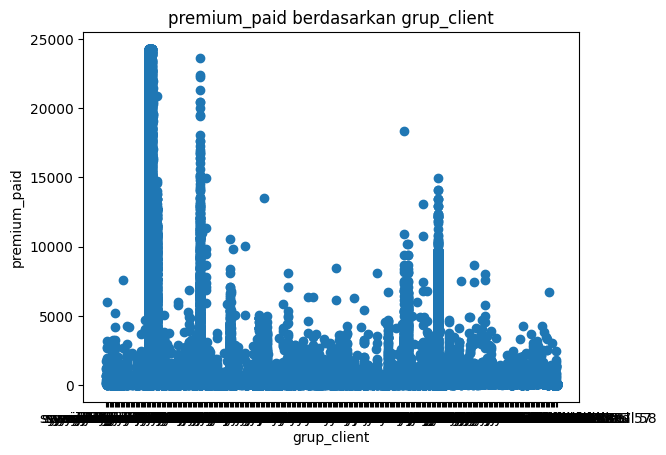

In [ ]:
# Mengambil kolom product_credit dan premium_paid
x = credit_life['grup_client']
y = credit_life['premium_paid']
plt.scatter(x, y)
plt.xlabel('grup_client')
plt.ylabel('premium_paid')
plt.title('premium_paid berdasarkan grup_client')

# Menampilkan plot
plt.show()

hubungan antara premium_paid dengan grup_client hampir tidak ada korelasinya, walaupun bisa dapat di ambil kesimpulan bahwa premium_paid paling banyak dihasilkan oleh "syariah bank"

# **Additional Analytics**

Melihat hubungan antara masing-masing variable (Grup_client, product_credit) jika nilai premium_paid dibandingkan premium_production

# Bivariate

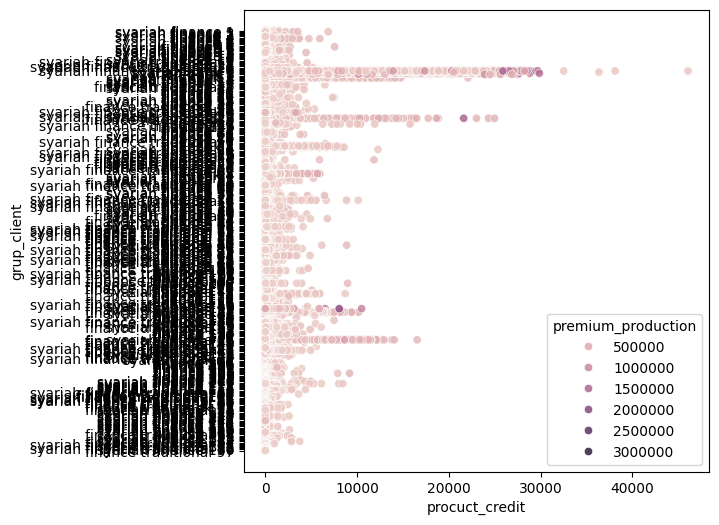

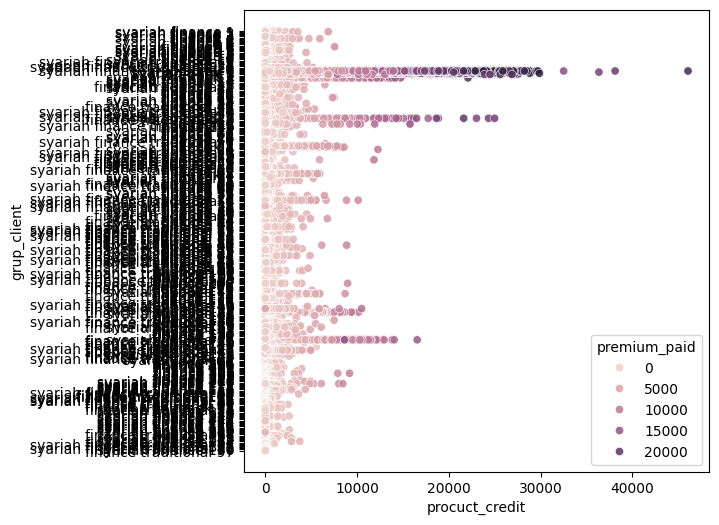

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=credit_life, hue=hue, alpha=0.85)

cat_columns = ['premium_production', 'premium_paid']
for cat in cat_columns:
    bivariate_scatter('procuct_credit', 'grup_client', cat, credit_life)

Dari gambaran analisa Bivariate telah terkonfirmasi bahwa: baik dari variable keduanya (Produk Kredit, Grup Klien) jika dibandingkan dengan Premium Production dan Premium Paid memiliki hubungan positif dengan outlier yang cukup signifikan

# Hisplot

Membandingkan dengan Hisplot hubungan nilai premium_paid dengan premium_production

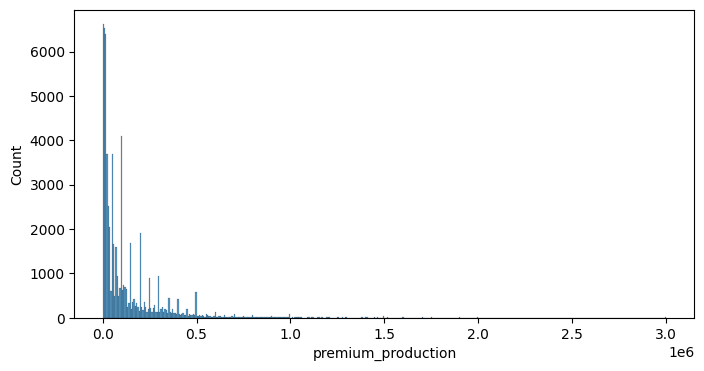

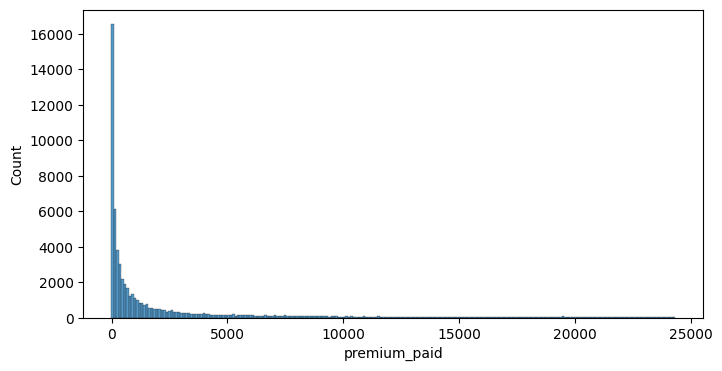

In [ ]:
# Melakukan perbandingan dengan mengambil kolom premium_production
num_columns = ['premium_production','premium_paid']
cat_columns = ['procuct_credit','gender','grup_client']

for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=credit_life, x=numerical)

Visualisasi dari Hisplot tersebut menggambarkan bahwa ratio perbedaan antara premium_production dengan premium_paid terlampau jauh atau hanya 2%-3% dari transaksi asuransi yang telah dibayarkan

# CLUSTERING

**Featuring Engineering**

In [ ]:
# Melakukan drop kolom yang dibutuhkan untuk proses Clustering
credit_life_transformed = credit_life.drop(['no', 'month', 'year', 'customer_id','gender','grup_client','participant', 'dob', 'polis_date_in', 'polis_date_out','total_fee','procuct_credit','c1', 'c2','c3'], axis=1)
credit_life_transformed.head()


age  tenure_(month)  sum_of_amount  premium_production  premium_nett  \
0   26              24    260000000.0            260000.0     161.20000   
1   34              18     13420000.0             13420.0       7.51520   
2   30              36    286400000.0            286400.0     292.12800   
3   35              36     43524000.0             43524.0      54.84024   
4   44              36     66870000.0             66870.0     175.19940   

   premium_paid  
0     644.80000  
1      30.06080  
2    1168.51200  
3     219.36096  
4     700.79760

In [ ]:
# Melalukan Perhitungan Scala
scaler = MinMaxScaler()
X = scaler.fit_transform(credit_life_transformed)
X[0]

array([0.29333333, 0.06666667, 0.08665753, 0.08665753, 0.01797118,
       0.02664139])

**Clustering K-Means**

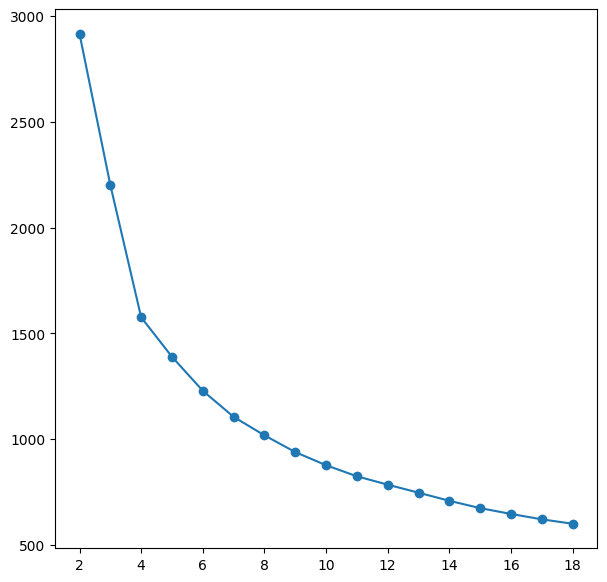

In [ ]:
from sklearn.cluster import KMeans

clusters_range = range(2,19)
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0, n_init=10).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

siku dalam plot yang menunjukkan di mana penurunan dalam inersia mulai melambat (elbow method) berada pada skala 1500

In [ ]:
# Melakukan Visualisasi Clustering dengan Yellow Brick dan SilhouetteVisualizer
!pip install yellowbrick

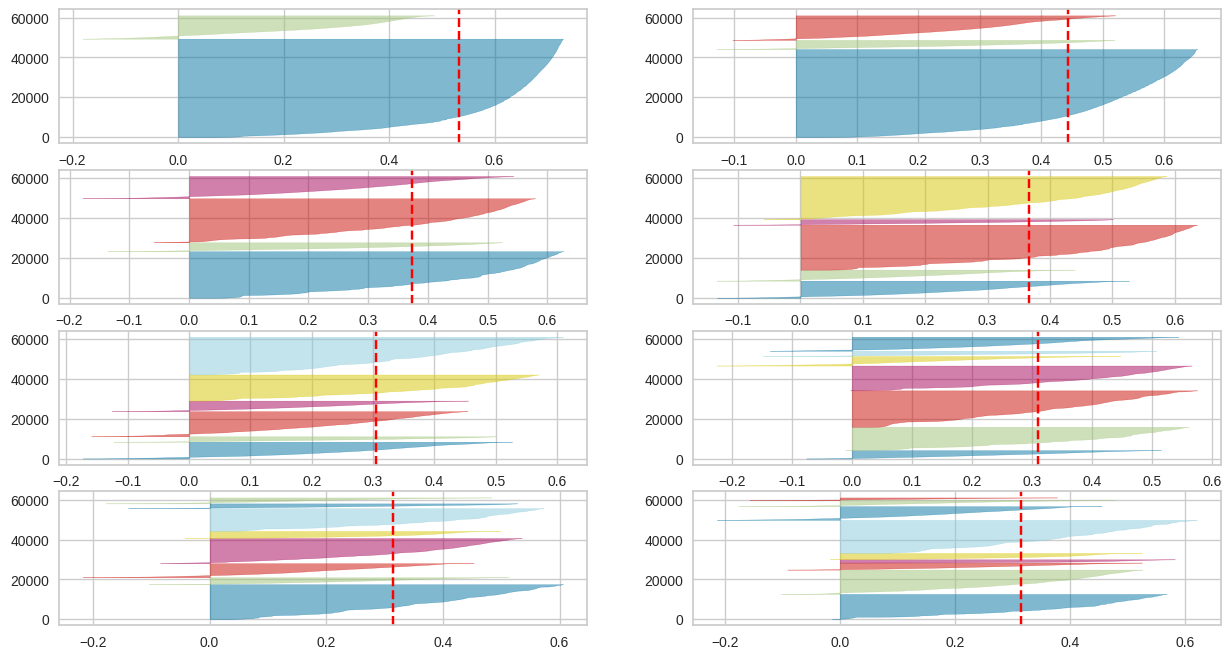

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Nilai Silhouette tertinggi dari > 0.4 menunjukkan bahwa titik data memiliki jarak terbaik dengan titik-titik dalam klaster yang sama.


##**EVALUATION**

In [ ]:
# Melakukan Evaluasi menggunakan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
# Melakukan Clustering premium_paid dengan 3 jenis Klasifikasi yang dibuat
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
# Melakukan Cluster dengan jumlah 5 Cluster
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Melakukan Labeling terhadap hasil PCA
labels = kmeans.labels_
X_pca_df['Credit_life_Clustering'] = labels

In [ ]:
# Melakukan Visualisasi PCA
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Credit_life_Clustering'])
fig.show()

*   C1 = Klasifikasi Berdasarkan Uang Asuransi
*   C2 = Klasifikasi Berdasarkan Masa Asuransi
*   C3 = Klasifikasi Berdasarkan Usia Masuk Asuransi

yang dibandingkan dengan nilai premium_paid. Sehingga Clustering di atas sudah terclustering dengan baik.

#**Menggunakan TSNE**

In [ ]:
# Melakukan Clustering dengan Metode TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30.0, learning_rate=200.0, n_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(X)

In [ ]:
# Melakukan Visualisasi dengan Metode TSNE
import plotly.graph_objs as go


trace = go.Scatter3d(
    x=X_embedded[:, 0],
    y=X_embedded[:, 1],
    z=X_embedded[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

layout = go.Layout(
    title='Visualisasi t-SNE 3D',
    scene=dict(
        xaxis=dict(title='Dimensi 1'),
        yaxis=dict(title='Dimensi 2'),
        zaxis=dict(title='Dimensi 3')
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


Walau masih sedikit bercampur, tapi clustering yang telah divisualisasikan oleh TSNE sudah tercluster dengan baik

In [ ]:
# Melakukan label klaster yang telah diberikan oleh algoritma K-Means
results_df = credit_life_transformed
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'tenure_(month)':'int64', 'age':'int64', 'premium_production':'float64','premium_paid':'float64'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61053 entries, 0 to 62480
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 61053 non-null  int64  
 1   tenure_(month)      61053 non-null  int64  
 2   sum_of_amount       61053 non-null  float64
 3   premium_production  61053 non-null  float64
 4   premium_nett        61053 non-null  float64
 5   premium_paid        61053 non-null  float64
 6   Labels              61053 non-null  int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 3.5 MB


#**Interpretation**

In [ ]:
# Melakukan penyimpanan dictionary cluster
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T

In [ ]:
# Cluster 0
summary[0]

count          mean           std        min  \
age                 12507.0  5.424666e+01  5.180556e+00     43.000   
tenure_(month)      12507.0  4.395435e+01  2.799549e+01      0.000   
sum_of_amount       12507.0  7.337238e+07  8.606694e+07  30000.000   
premium_production  12507.0  7.337238e+04  8.606694e+04     30.000   
premium_nett        12507.0  1.420066e+02  2.072687e+02      0.000   
premium_paid        12507.0  1.343649e+03  1.733930e+03     -0.025   
Labels              12507.0  0.000000e+00  0.000000e+00      0.000   

                             25%           50%           75%           max  
age                 5.100000e+01  5.300000e+01  5.600000e+01  7.900000e+01  
tenure_(month)      2.400000e+01  3.600000e+01  6.000000e+01  1.570000e+02  
sum_of_amount       1.725000e+07  4.900000e+07  1.000000e+08  1.154873e+09  
premium_production  1.725000e+04  4.900000e+04  1.000000e+05  1.154873e+06  
premium_nett        9.243375e+00  5.664375e+01  2.016750e+02  2.847725e+03  
premium_paid        1.368000e+02  6.547500e+02  1.904417e+03  1.188003e+04  
Labels              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00

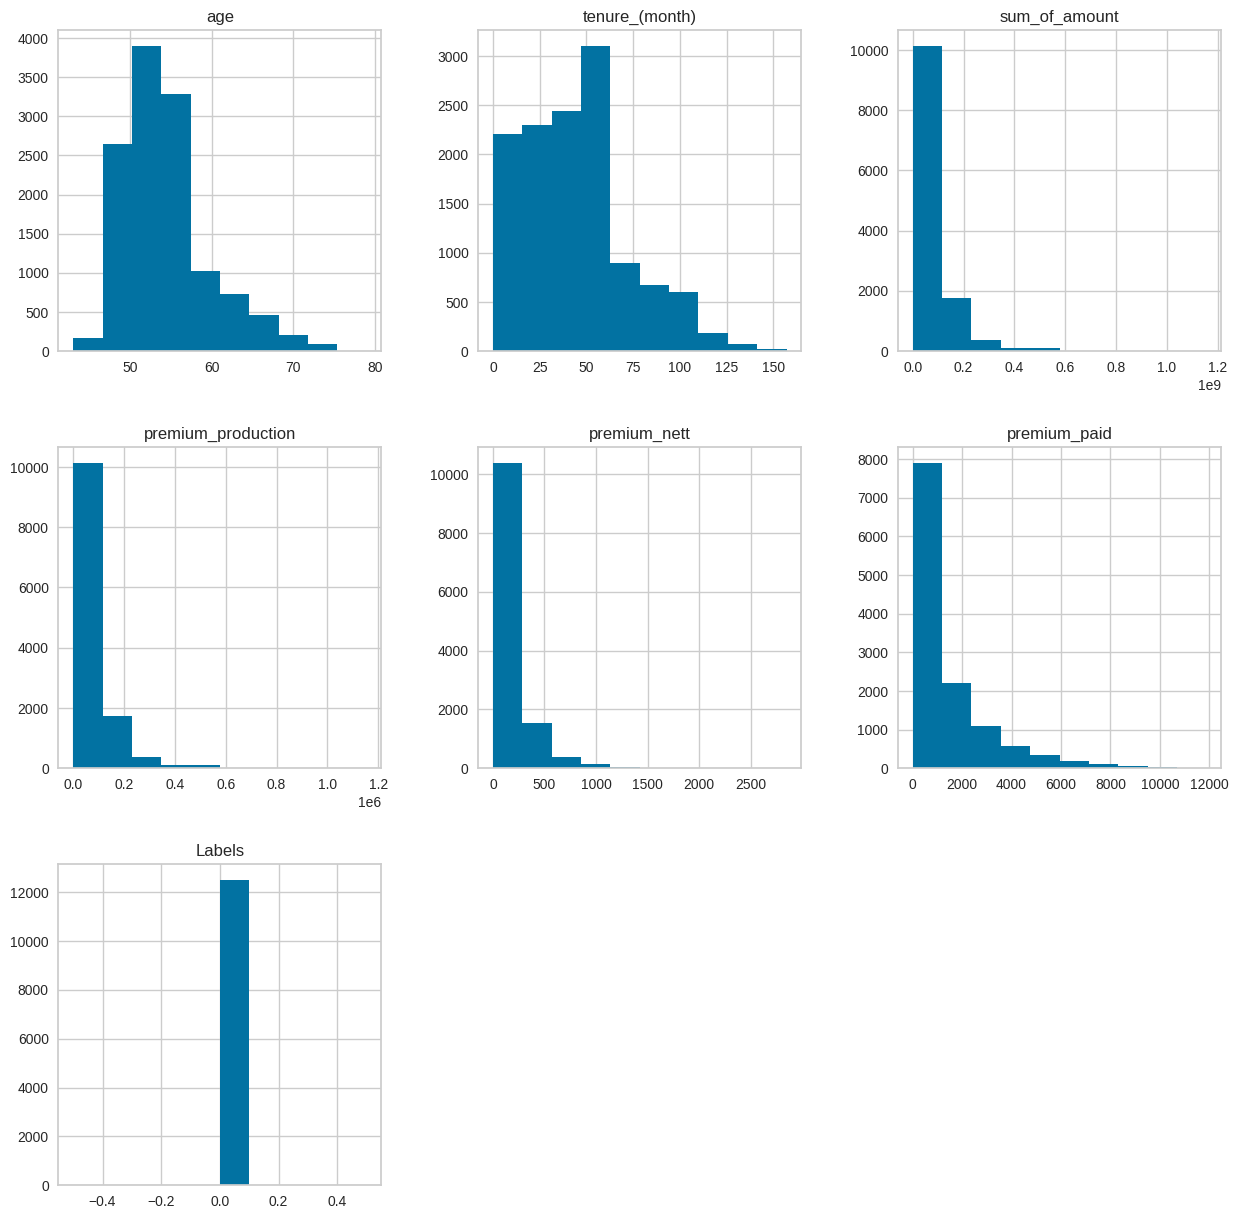

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

Tren dari cluster 0
1.   age : 50-55 tahun
2.   tenure 50-70 bulan
3.   sum of amount < 100 juta





In [ ]:
# Cluster 1
summary[1]

count          mean           std       min  \
age                 13112.0  2.791504e+01  5.506483e+00       4.0   
tenure_(month)      13112.0  3.342236e+01  2.022286e+01       0.0   
sum_of_amount       13112.0  5.667435e+07  7.541463e+07  552000.0   
premium_production  13112.0  5.667435e+04  7.541463e+04     552.0   
premium_nett        13112.0  3.870410e+01  7.490216e+01       0.0   
premium_paid        13112.0  3.255981e+02  5.187033e+02      -3.1   
Labels              13112.0  1.000000e+00  0.000000e+00       1.0   

                             25%           50%          75%           max  
age                 2.600000e+01  2.900000e+01        32.00  3.400000e+01  
tenure_(month)      1.200000e+01  3.600000e+01        48.00  9.800000e+01  
sum_of_amount       1.000000e+07  2.500000e+07  80000000.00  1.500000e+09  
premium_production  1.000000e+04  2.500000e+04     80000.00  1.500000e+06  
premium_nett        2.250421e+00  1.060100e+01        41.23  1.185600e+03  
premium_paid        3.290667e+01  1.136819e+02       382.50  5.441769e+03  
Labels              1.000000e+00  1.000000e+00         1.00  1.000000e+00

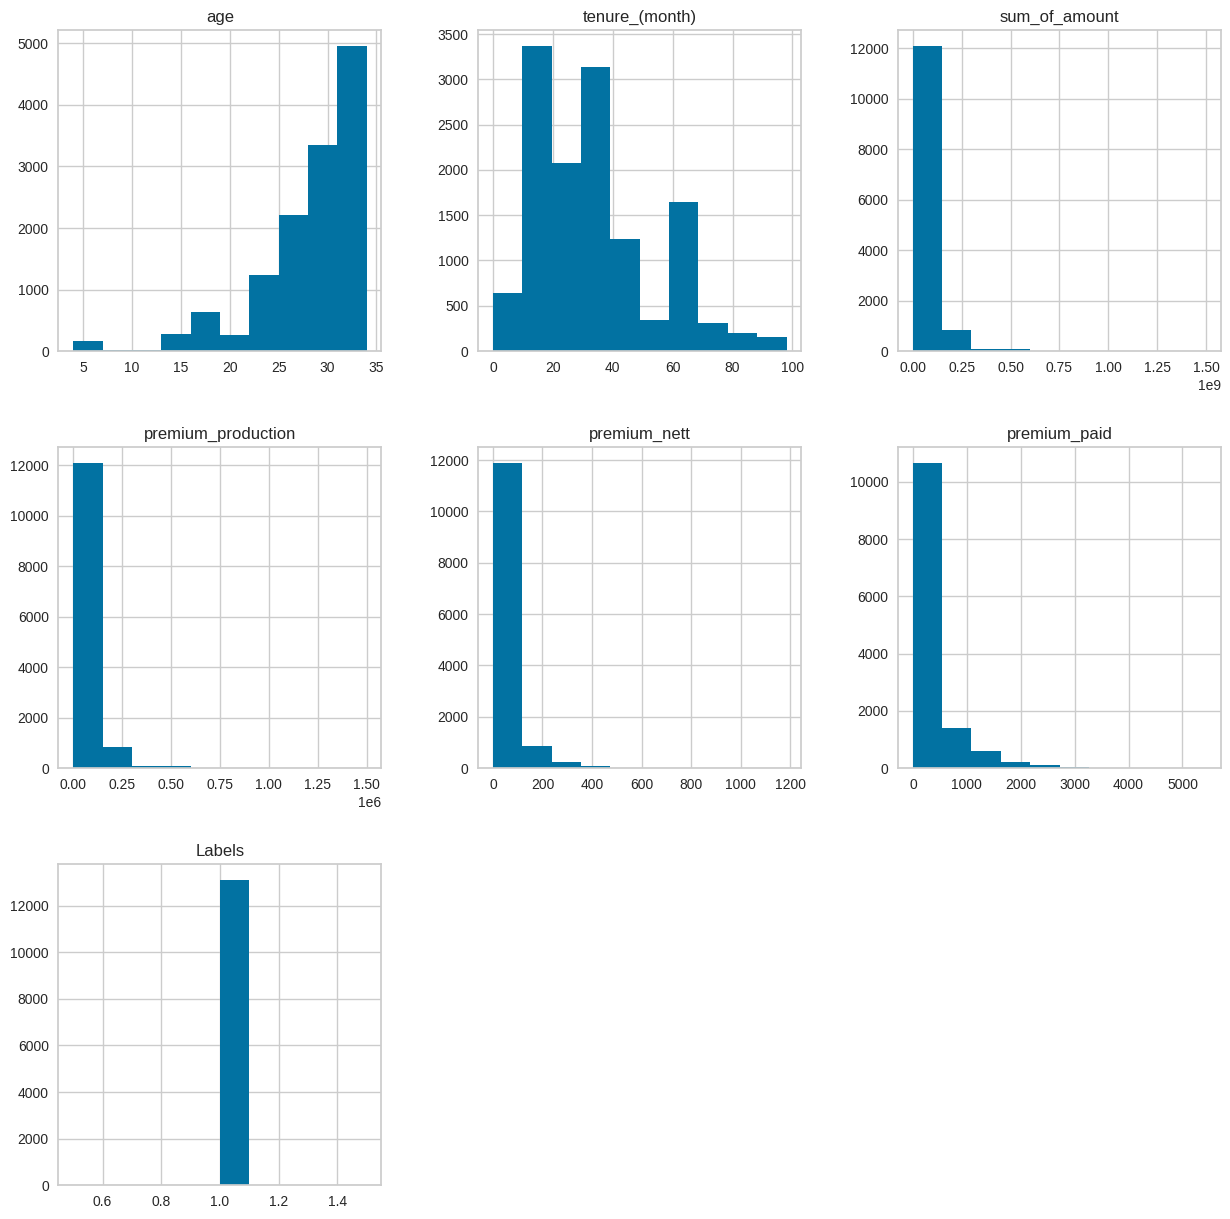

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

Tren dari cluster 1
1.   age : 30-35 tahun
2.   tenure 12-20 bulan
3.   sum of amount 100-200 juta

In [ ]:
# Cluster 2
summary[2]

count          mean           std           min  \
age                 5256.0  4.135654e+01  9.175567e+00  2.100000e+01   
tenure_(month)      5256.0  1.589787e+02  3.627864e+01  1.900000e+01   
sum_of_amount       5256.0  3.648947e+08  2.031379e+08  2.730104e+07   
premium_production  5256.0  3.648947e+05  2.031379e+05  2.730104e+04   
premium_nett        5256.0  1.146346e+03  6.524528e+02  0.000000e+00   
premium_paid        5256.0  8.355643e+03  2.287717e+03  0.000000e+00   
Labels              5256.0  2.000000e+00  0.000000e+00  2.000000e+00   

                             25%           50%           75%           max  
age                 3.500000e+01  4.000000e+01  4.700000e+01  6.700000e+01  
tenure_(month)      1.310000e+02  1.800000e+02  1.800000e+02  3.600000e+02  
sum_of_amount       2.500000e+08  3.150000e+08  4.495363e+08  2.627098e+09  
premium_production  2.500000e+05  3.150000e+05  4.495363e+05  2.627098e+06  
premium_nett        6.957709e+02  1.123106e+03  1.485990e+03  4.209604e+03  
premium_paid        6.550599e+03  8.024405e+03  9.972192e+03  1.496326e+04  
Labels              2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00

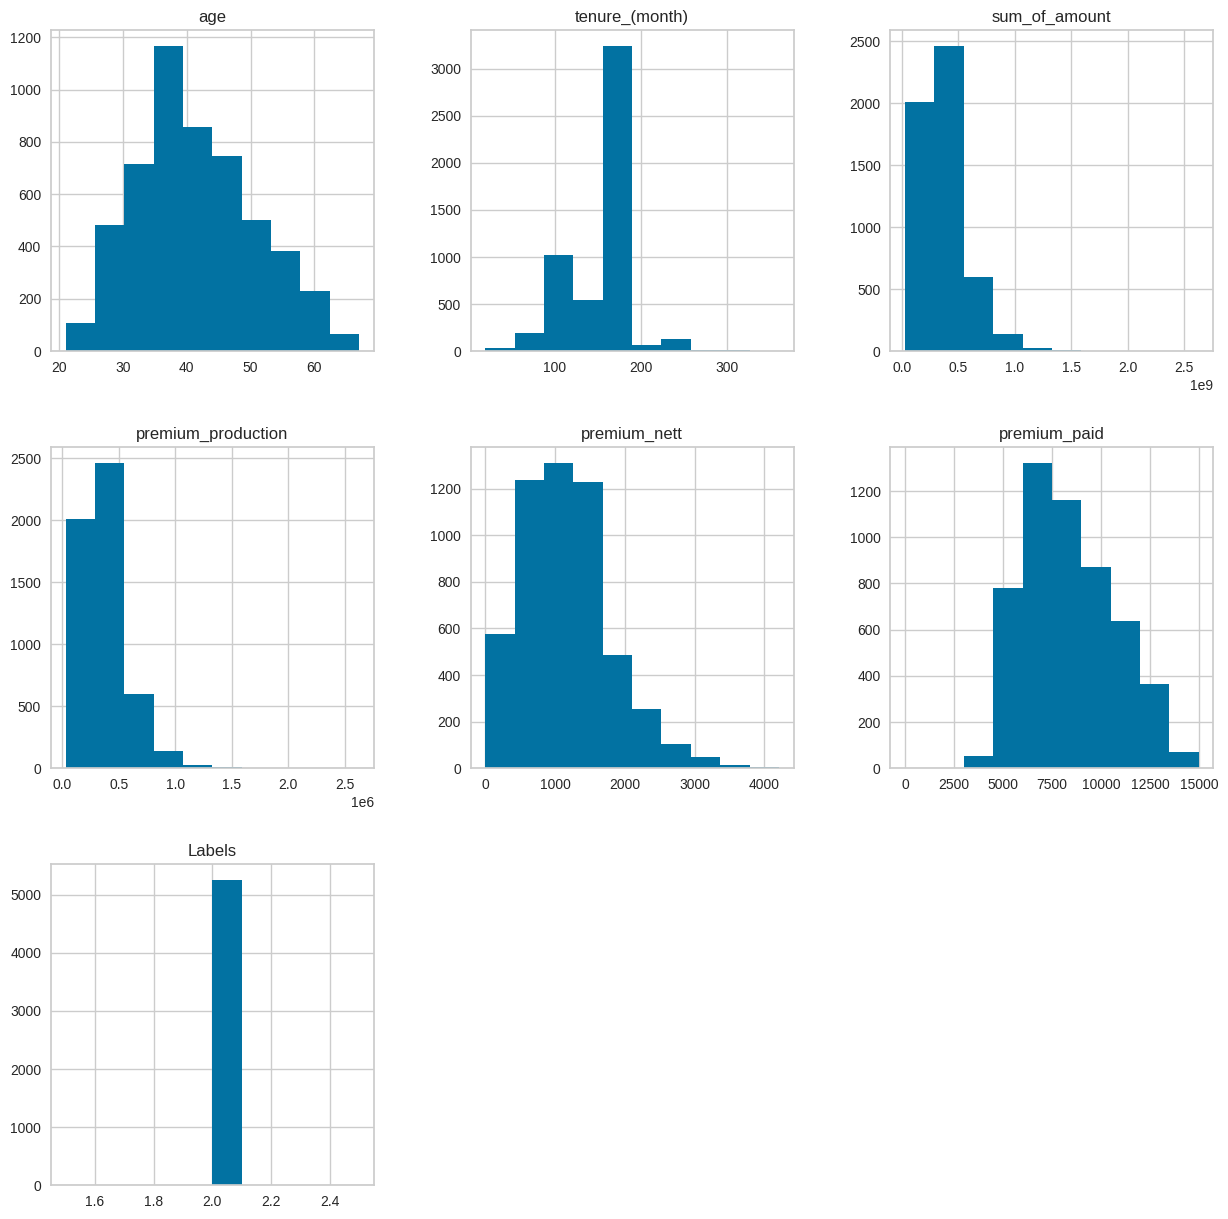

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

Tren dari cluster 2
1.   age : 35-40 tahun
2.   tenure 150-200 bulan
3.   sum of amount < 50 juta

In [ ]:
summary[3]

count          mean           std       min  \
age                 8435.0  3.717961e+01  7.256349e+00      19.0   
tenure_(month)      8435.0  1.407737e+02  3.714212e+01      60.0   
sum_of_amount       8435.0  1.425354e+08  1.209649e+08  750000.0   
premium_production  8435.0  1.425354e+05  1.209649e+05     750.0   
premium_nett        8435.0  3.360130e+02  2.725303e+02       0.0   
premium_paid        8435.0  2.221196e+03  1.554706e+03       0.0   
Labels              8435.0  3.000000e+00  0.000000e+00       3.0   

                             25%           50%           75%           max  
age                 3.200000e+01  3.700000e+01  4.300000e+01  6.200000e+01  
tenure_(month)      1.200000e+02  1.200000e+02  1.800000e+02  2.530000e+02  
sum_of_amount       4.000000e+07  1.100000e+08  2.000000e+08  9.534988e+08  
premium_production  4.000000e+04  1.100000e+05  2.000000e+05  9.534988e+05  
premium_nett        1.029054e+02  2.673850e+02  5.057623e+02  1.595000e+03  
premium_paid        7.862500e+02  2.040000e+03  3.394963e+03  6.809977e+03  
Labels              3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00

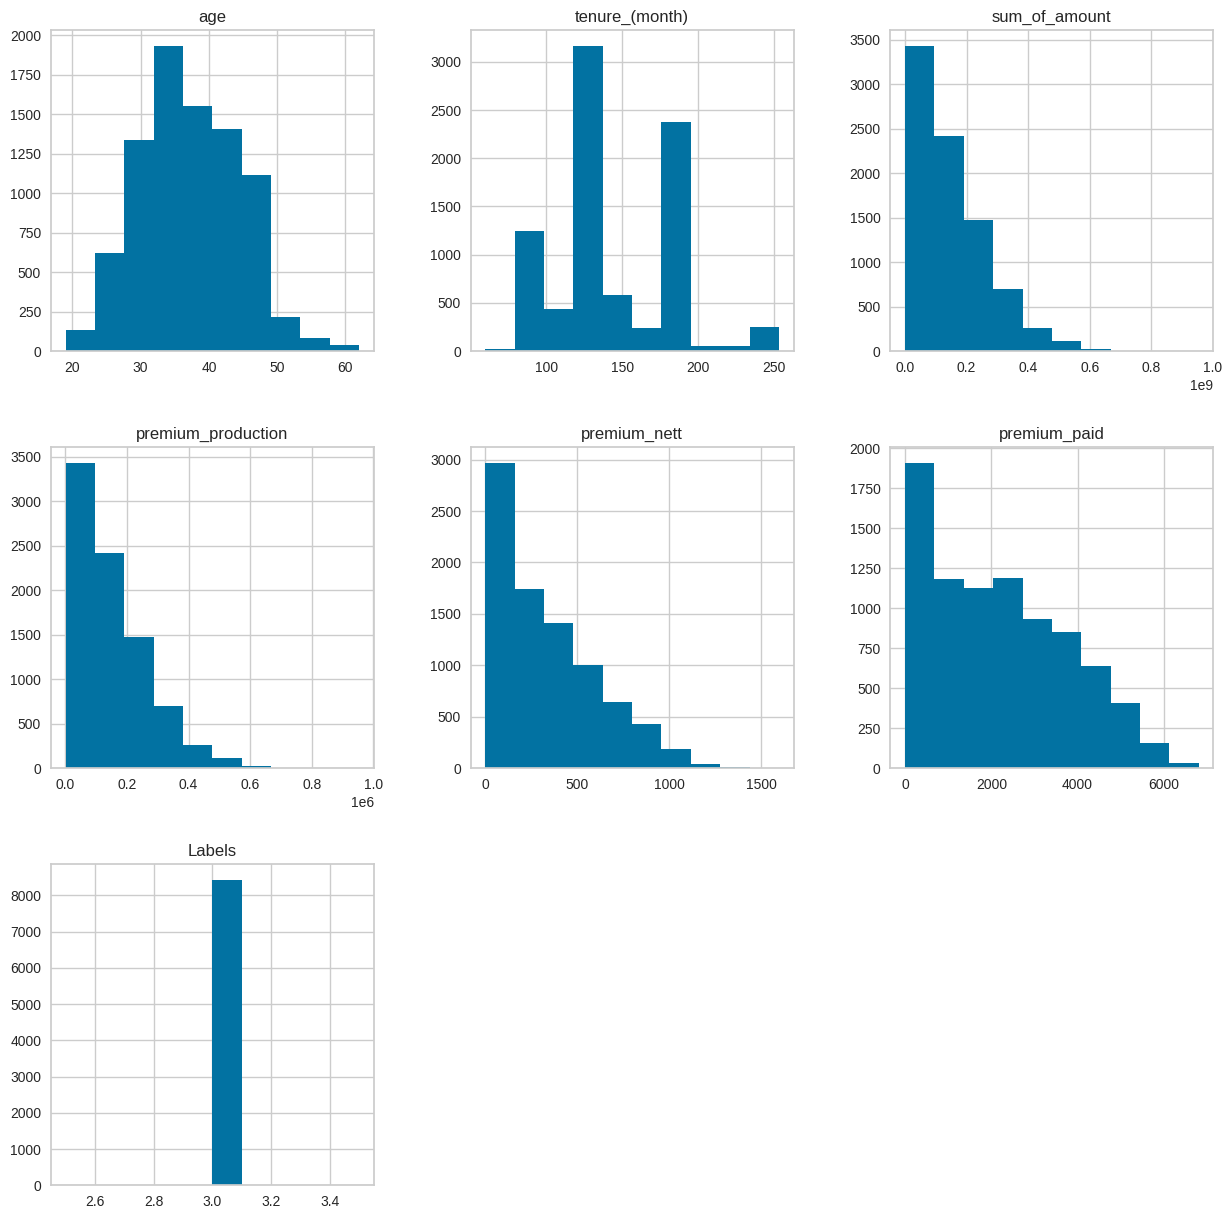

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

Tren dari cluster 3
1.   age : 50-55 tahun
2.   tenure 120-144 bulan
3.   sum of amount 100-150 juta

In [ ]:
summary[4]

count          mean           std         min  \
age                 19054.0  4.137100e+01  3.950877e+00      35.000   
tenure_(month)      19054.0  3.192332e+01  1.926137e+01       0.000   
sum_of_amount       19054.0  5.300919e+07  7.161281e+07  300000.000   
premium_production  19054.0  5.300919e+04  7.161281e+04     300.000   
premium_nett        19054.0  4.836856e+01  8.325293e+01       0.000   
premium_paid        19054.0  4.322279e+02  6.158212e+02      -0.025   
Labels              19054.0  4.000000e+00  0.000000e+00       4.000   

                             25%           50%           75%           max  
age                 3.800000e+01  4.100000e+01  4.500000e+01  5.000000e+01  
tenure_(month)      1.200000e+01  2.800000e+01  4.800000e+01  9.600000e+01  
sum_of_amount       1.000000e+07  2.500000e+07  7.000000e+07  8.200000e+08  
premium_production  1.000000e+04  2.500000e+04  7.000000e+04  8.200000e+05  
premium_nett        2.786856e+00  1.420974e+01  5.825909e+01  1.143971e+03  
premium_paid        4.512500e+01  1.680325e+02  5.864400e+02  5.683500e+03  
Labels              4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00

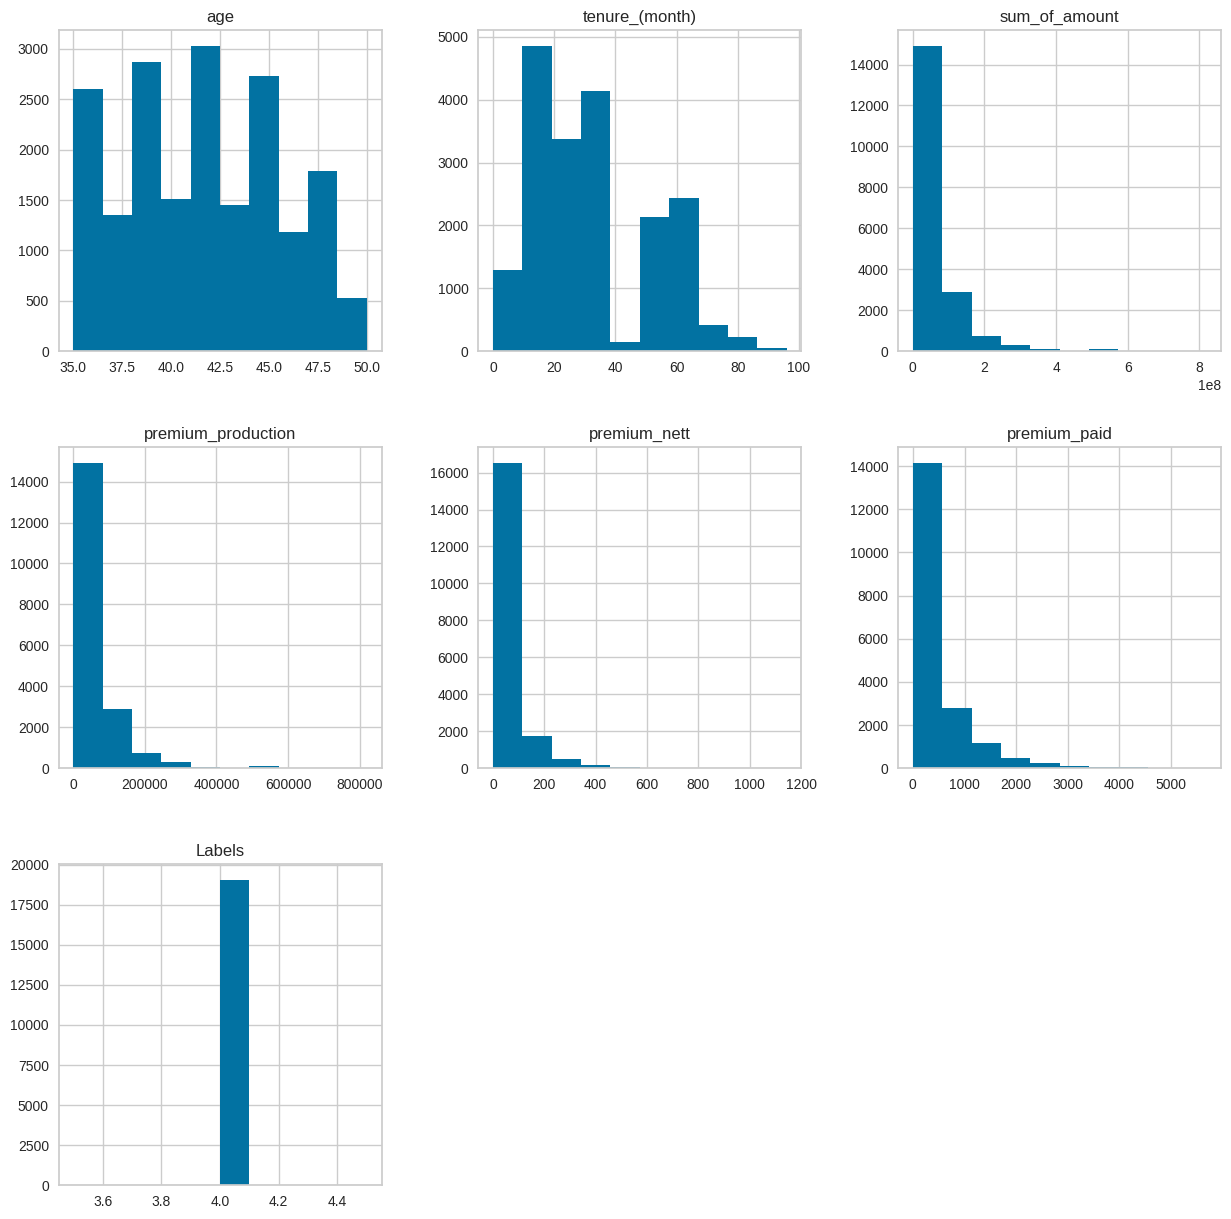

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

Tren dari cluster 4
1.   age : 35-45 tahun
2.   tenure 12-20 bulan
3.   sum of amount < 100 juta

In [ ]:
summary[5]

count          mean           std           min  \
age                 2689.0  5.198438e+01  9.721328e+00  2.500000e+01   
tenure_(month)      2689.0  1.581335e+02  3.709988e+01  1.900000e+01   
sum_of_amount       2689.0  4.169815e+08  3.129406e+08  6.225487e+07   
premium_production  2689.0  4.169815e+05  3.129406e+05  6.225487e+04   
premium_nett        2689.0  1.618105e+03  1.191300e+03  0.000000e+00   
premium_paid        2689.0  1.763706e+04  3.370699e+03  1.107747e+04   
Labels              2689.0  5.000000e+00  0.000000e+00  5.000000e+00   

                             25%           50%           75%           max  
age                 4.400000e+01  5.400000e+01  5.900000e+01  7.100000e+01  
tenure_(month)      1.370000e+02  1.800000e+02  1.800000e+02  3.430000e+02  
sum_of_amount       1.996849e+08  3.527997e+08  5.000000e+08  3.000000e+09  
premium_production  1.996849e+05  3.527997e+05  5.000000e+05  3.000000e+06  
premium_nett        9.693750e+02  1.288772e+03  1.958040e+03  8.969920e+03  
premium_paid        1.485329e+04  1.731438e+04  2.021222e+04  2.431620e+04  
Labels              5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00

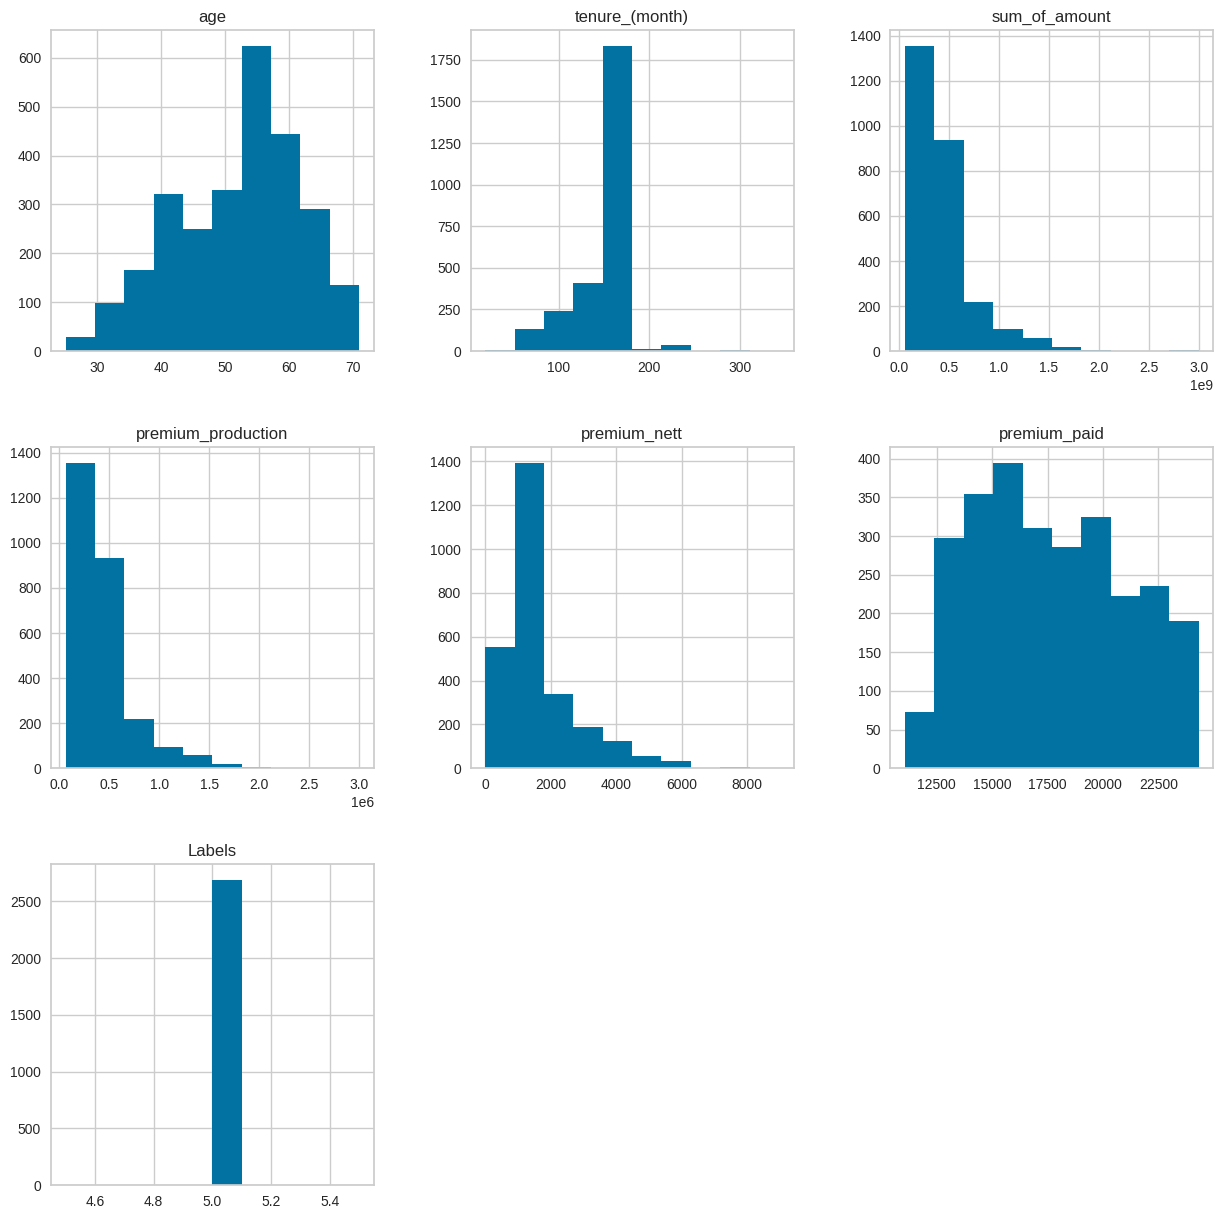

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

Tren dari cluster 5
1.   age : 55-57 tahun
2.   tenure 120-144 bulan
3.   sum of amount < 200 juta

#**Evaluation and Business Recomendation**

**Answering the Bussiness Issues:**



1. Q : Apakah setiap perticipant yang melakukan penutupan
   Asuransi selalu membayar premiumnya?

   A : Dari total premium_production hanya 2-3% yang melakukan pembayaran premi (Premium_paid). Hal ini mengakibat kecenderungan yang tinggi "perilaku Participant  

2. Q : Relasi antara Age dalam premium paid of Credit Life?
   
   A : Relasi antara age dalam premium paid adalah bahwa asuransi memiliki tren paling banyak di kelompok sebaran usia yang paling sering melakukan akad asuransi dan membayarnya adalah kelompok usia productive, pra pension, dan pension. Jadi, terlalu sedikit untuk kelompok usia young

   Q : Relasi antara Product Credit dalam premium paid of Credit Life?
   
   A : Produk Kredit yang paling banyak diminati adalah pinjaman karyawan tetap (employee) dengan group client terbanyak adalah "syariah bank"

   Q : Relasi antara Gender dalam premium paid of Credit Life?
   
   A : Tidak ada korelasi Jenis Kelamin yang paling banyak membayar asuransi yang mereka akad adalah perempuan (female)

4. Q : Bandingkan Clustering tersebut dengan Klasifikasi
   yang telah dibuat dari Penyebaran Variabel sum of amount, tenure, dan age
   
   A : Hasil Clustering dan Klasifikasi yang dibuat masih dalam koridor yang sama sehingga data clustering dapat bekerja dengan baik dan ada distribusi yang perlu disederhanakan yang akan di bahas pada Bisnis Rekomendation






#**BUSINESS RECOMENDATION**

**Segmentation Product dan Clustering**





1. Dalam Clustering telah dikemukakan bahwa Uang Asuransi
memiliki rentang tren sampai dengan 200 juta, maka perusahaan dapat menjadikan nilai Uang Asuransi ini sebagai target marketing kedepan
2. Perusahaan dapat membatasi atau memfokuskan Masa Asuransi dari Medium dan Long yaitu antara 4-20 tahun karena masa asuransi yang paling menguntungkan adalah jenis klasifikasi : long dan medium
3. Perusahaan dapat membatasi atau memfokuskan Uang Asuransi dari High yaitu antara > 1M - 3M karena tren premium_paid yang baik dalam range Uang Asuransi tersebut
4. Untuk kelompok usia “Young” memang tidak memungkinkan untuk membuka pinjaman dikarenakan faktor belum adanya penghasilan sehingga untuk Kredit masih terwakilkan oleh pihak wakil. Dalam hal ini, menurut hemat kami agar program asuransi kelompok Usia ini tidak begitu dilirik sehingga produk bisa ditiadakan





